In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
import math
import random
import json

# 1

125.33141373155001
125.33141373155001
125.33141373155001
125.33141373155001
125.33141373155001


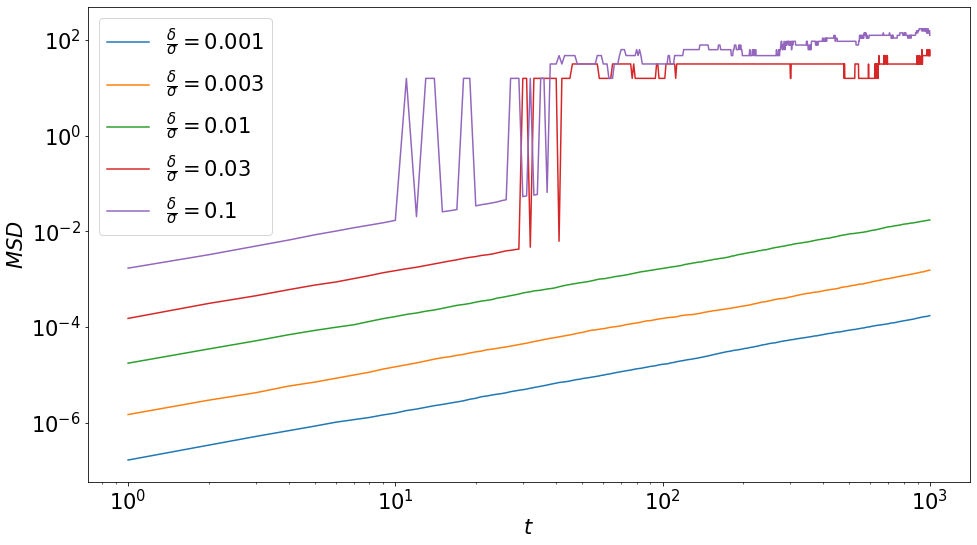

In [2]:
fig = plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 21})
json_open1 = open('./values/output1.json', 'r')
json_load1 = json.load(json_open1)

msds = json_load1["msds"]
times = json_load1["times"]
mus = json_load1["mus"]

ax = [0]*2
# xlims = [(-6, 6), (-3.5, 3.5)]
for i in range(1):
    ax[i] = fig.add_subplot(1, 1, i+1)
    ax[i].set_xscale('log')
#     ax[i].set_xlim(0.8,1010)
#     ax[i].set_ylim(0.8,500)
    ax[i].set_yscale('log')
    for j in range(len(msds)-1):
        print(mus[j]["Lx"])
        label = r"$\frac{\delta}{\sigma}=$"+str(mus[j]["Ratio"])
        ax[i].plot([k for k in range(1,times+1)], msds[j], label=label)
    
    ax[i].legend()
    ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.tight_layout()
fig.savefig("problem1.png", dpi=400, pad_inches=0)

# 2

656288
260146
63831


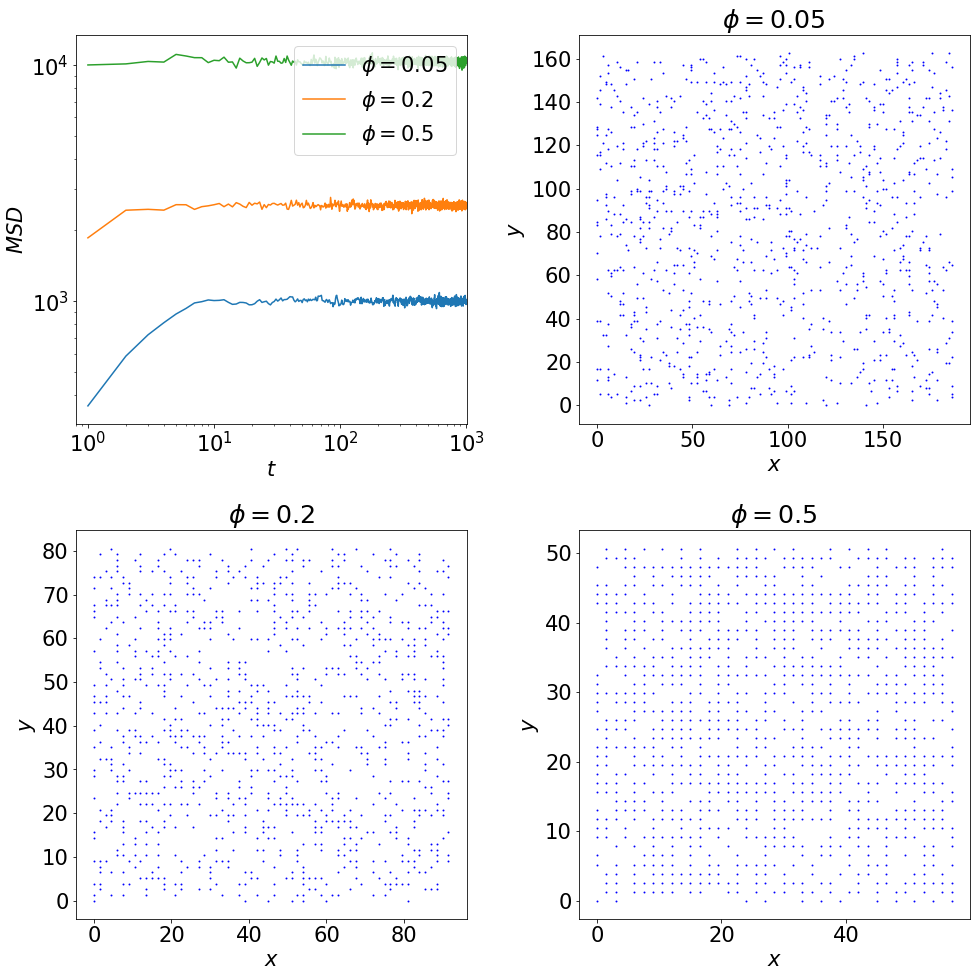

In [3]:
fig = plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 21})
json_open = open('./values/problem2/output.json', 'r')
json_load = json.load(json_open)

msds = json_load["msds"]
times = json_load["times"]
mus = json_load["mus"]
phis = [0.05, 0.2, 0.5]
positions ={
    0.05: 2,
    0.2: 3,
    0.5: 4,
}


ax = [0]*(len(mus)+1)
# xlims = [(-6, 6), (-3.5, 3.5)]
for i in range(1):
    ax[i] = fig.add_subplot(2, 2, i+1)
    ax[i].set_xscale('log')
    ax[i].set_xlim(0.8,times+10)
    ax[i].set_yscale('log')
    
    for j in range(len(msds)):
        label = r"$\phi =$"+str(phis[j])
        ax[i].plot([k for k in range(1,times+1)], msds[j], label=label)
    
    ax[i].legend(loc="upper right")
    ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

for i in range(1,len(mus)+1):
    ax[i] = fig.add_subplot(2, 2, positions[mus[i-1]["Phi"]])
    title = r"$\phi = $" + str(mus[i-1]["Phi"])#+" "+str(mus[i-1]["Accepted"])
    # ax[i].set_xlim(0,10)
    # ax[i].set_ylim(0,10)
    for particle in mus[i-1]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.9)
    print(mus[i-1]["Denied"])
    ax[i].set_xlabel(r"$ x $")
    ax[i].set_ylabel(r"$ y $")
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.tight_layout()
fig.savefig("problem2.png", dpi=400,pad_inches=0)

# 3.1

17742938
486501
502572
478841
2350656


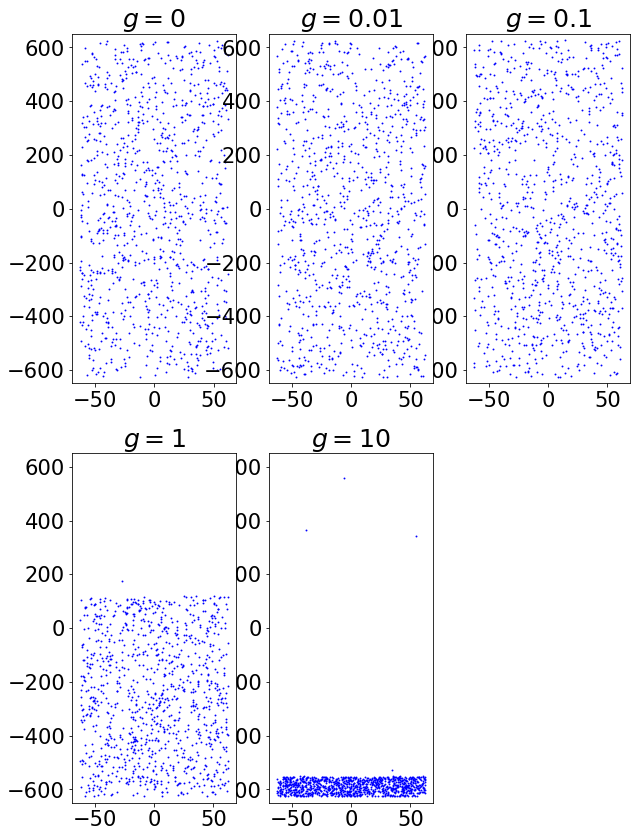

In [4]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    print(mus[i]["Denied"])
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.savefig("problem5.png")

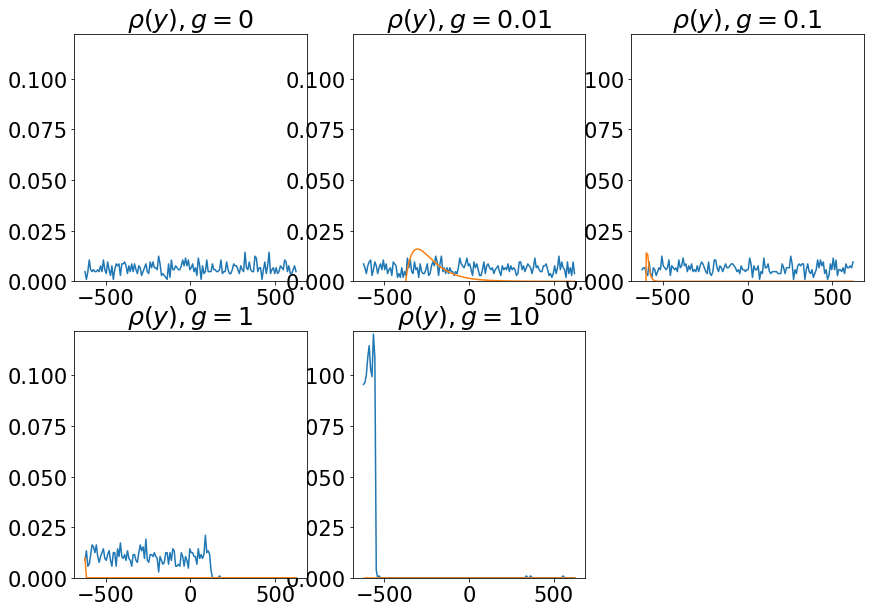

In [5]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/mu["Ly"]
    
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    ax[i].set_title(title)
fig.savefig("problem6.png")

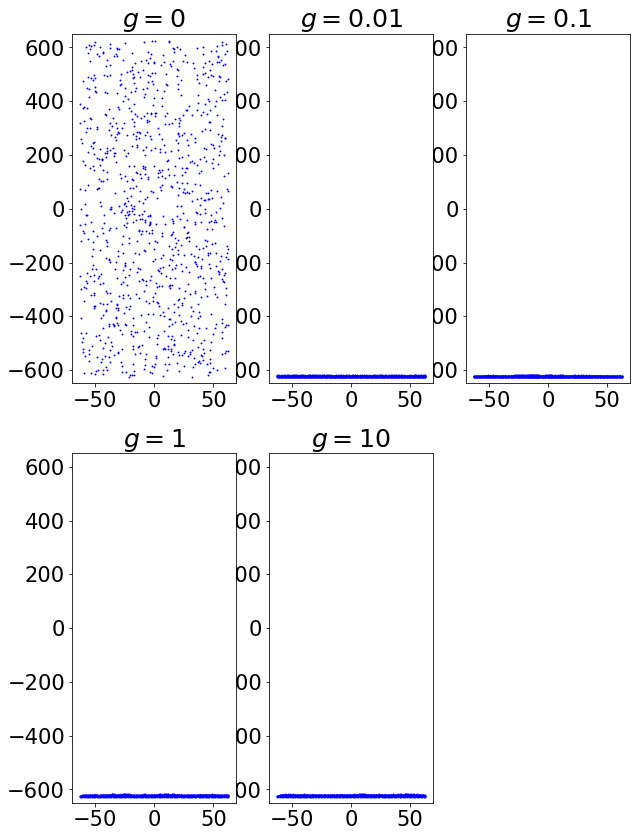

In [6]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3_2/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

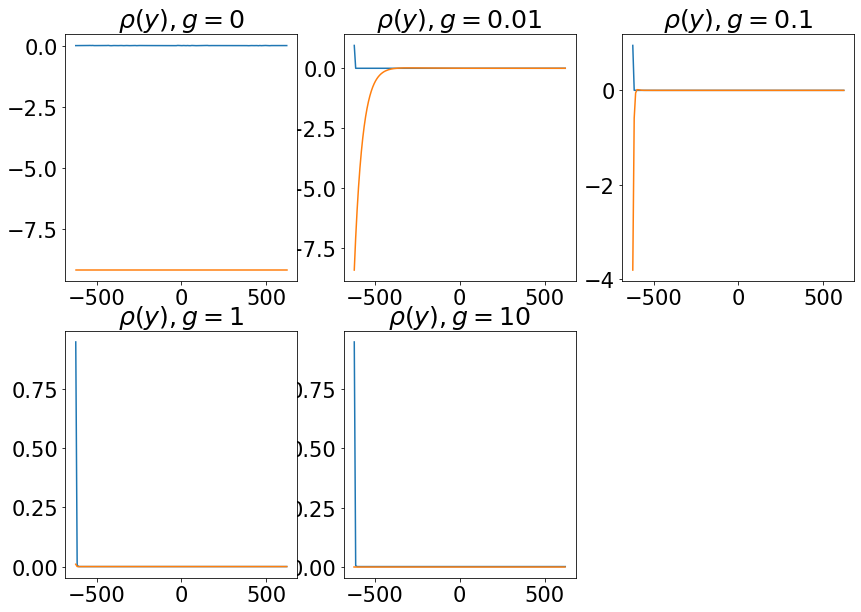

In [7]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3_2/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/mu["Ly"]
    
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    ax[i].set_title(title)

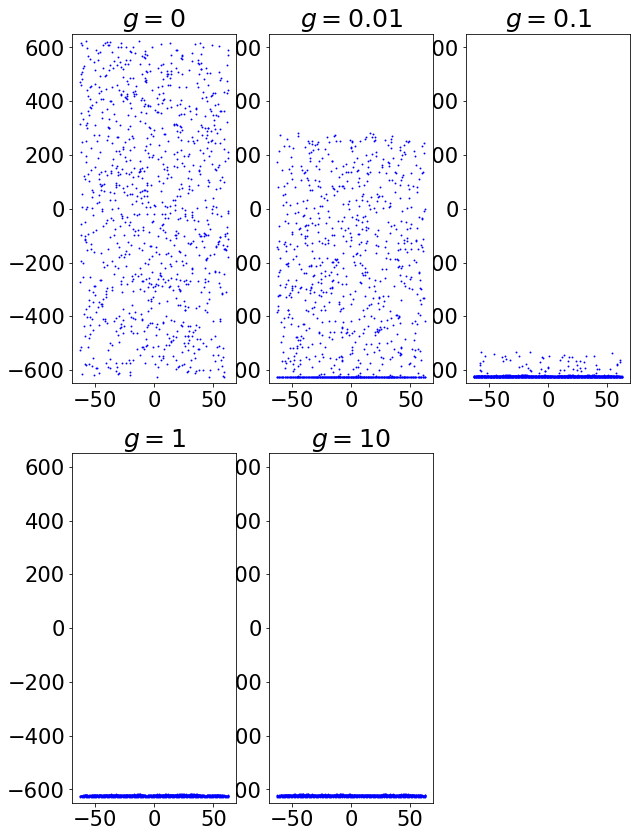

In [8]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3_2/output3.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

# 3.2

In [9]:
# fig = plt.figure(figsize=(10,14.1421356))
# json_open = open('./values/problem3/output_triangle.json', 'r')
# json_load = json.load(json_open)

# times = json_load["times"]
# mus = json_load["mus"]
# gravities = [0.0, 0.01, 0.1, 1, 10]
# positions ={
#     0.0: 1,
#     0.01: 2,
#     0.1: 3,
#     1: 4,
#     10: 5
# }

# ax = [0]*(len(mus))

# for i in range(len(mus)):
#     ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
# #     ax[i].set_xlim(-20,20)
#     ax[i].set_ylim(-650,650)
#     title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
#     for particle in mus[i]["Particles"]:
# #         label = r"$\phi =$"+str(phis[j])
#         ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
#     ax[i].set_title(title)
# #     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

In [10]:
# fig = plt.figure(figsize=(14.1421356,10))
# json_open = open('./values/problem3/output_triangle.json', 'r')
# json_load = json.load(json_open)

# times = json_load["times"]
# mus = json_load["mus"]
# ax = [0]*(len(mus))
# gravities = [0.0, 0.01, 0.1, 1, 10]
# positions ={
#     0.0: 1,
#     0.01: 2,
#     0.1: 3,
#     1: 4,
#     10: 5
# }

# num_bins = 150
# for i in range(len(mus)):
#     ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
#     # ax[i].set_ylim(0,0.122)
#     mu = mus[i] 
#     y = [particle["Y"] for particle in mu["Particles"]]
    
#     bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
#     particle_counts, _ = np.histogram(y, bins=bins)
#     bin_width = mu["Ly"] / num_bins
#     density = particle_counts / (bin_width * mu["Lx"])
#     bin_centers = 0.5 * (bins[1:] + bins[:-1])
#     theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
#     theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
#     rho_0 = len(mu["Particles"])/mu["Ly"]
    
#     # rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
#     rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)
    
    
#     ax[i].plot(bin_centers, density)
#     ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
#     ax[i].set_title(title)

# 3.3(true)

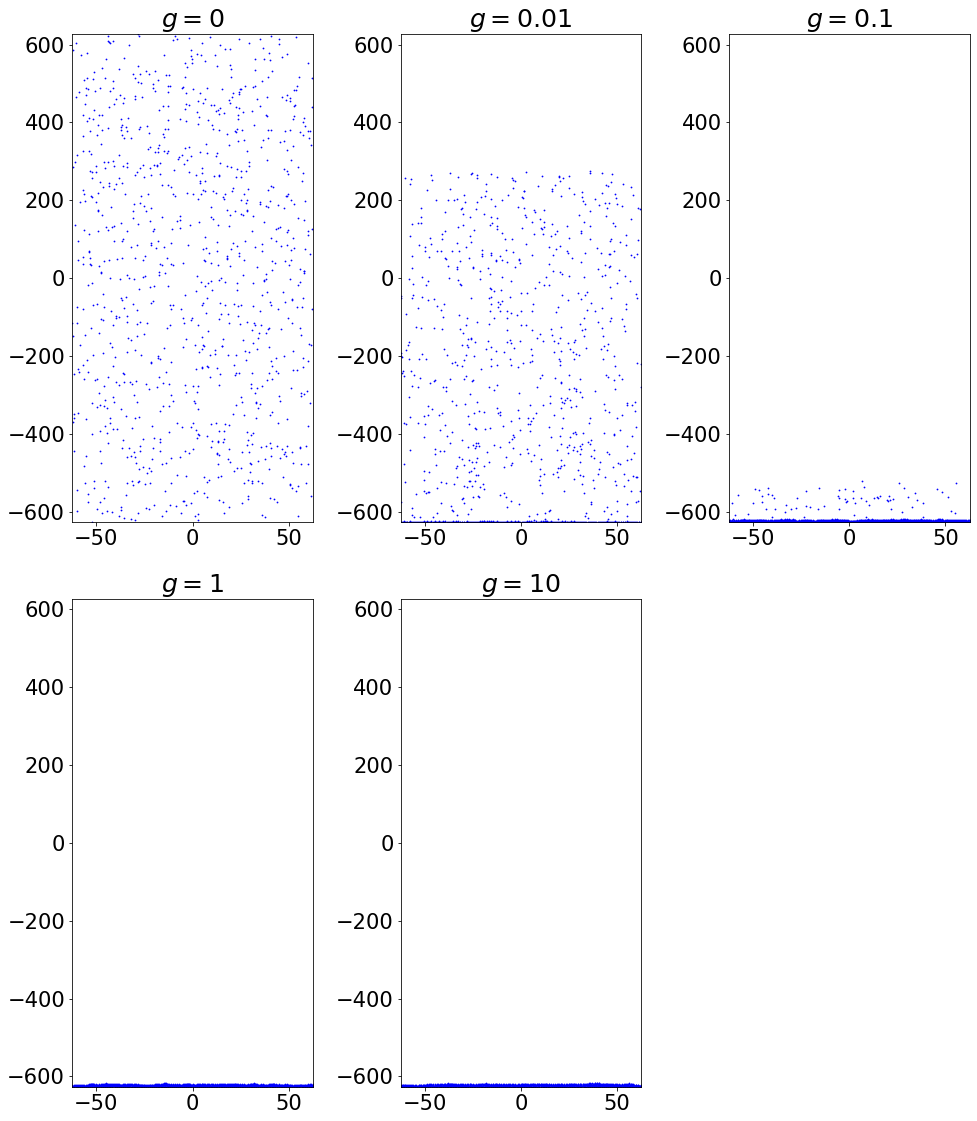

In [46]:
fig = plt.figure(figsize=(14, 16))
plt.rcParams.update({'font.size': 21})
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    ax[i].set_xlim(-mus[i]["Lx"]/2, mus[i]["Lx"]/2)
    # print(mus[i]["Denied"])
    ax[i].set_ylim(-mus[i]["Ly"]/2, mus[i]["Ly"]/2)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.6)
    # print(mus[i]["Denied"])
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.tight_layout()
fig.savefig("problem5_test.png", dpi=400,pad_inches=0)

In [12]:
def mgkbt(m,g,kb,t):
    return m*g/kb/t


OverflowError: math range error

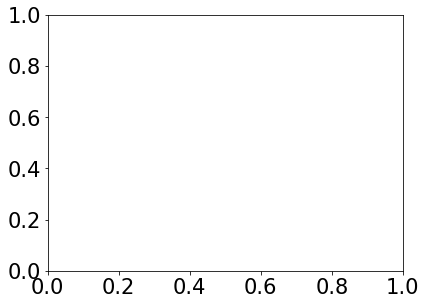

In [ ]:
fig = plt.figure(figsize=(14, 16))
plt.rcParams.update({'font.size': 21})
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 100
for i in range(len(mus)):
    ax[i] = fig.add_subplot(3, 2, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    # density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    mgkt = mgkbt(mus[i]["M"], mus[i]["Gravity"], mus[i]["Kb"], mus[i]["T"])
    # rho_0 = len(mu["Particles"])*mgkt/(math.sinh(mgkt*mu["Ly"]/2)*2)
    r
    print(rho_0)
    # rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)
    # print(density.sum(), str(mus[i]["Gravity"]))
    # ax[i].set_xlim(-mu["Ly"]/2, mu["Ly"]/2)
    ax[i].set_xlabel(r"$ y $")
    ax[i].set_ylabel(r"$ \rho(y) $")
    ax[i].hist(y, bins=num_bins)
    # ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Boltzman dist.", linestyle='-', lw=2)
    # print(rho_theoretical[0])
    ax[i].legend()
    ax[i].set_title(title)
fig.tight_layout()
fig.savefig("problem6_test.png", dpi=400,pad_inches=0)

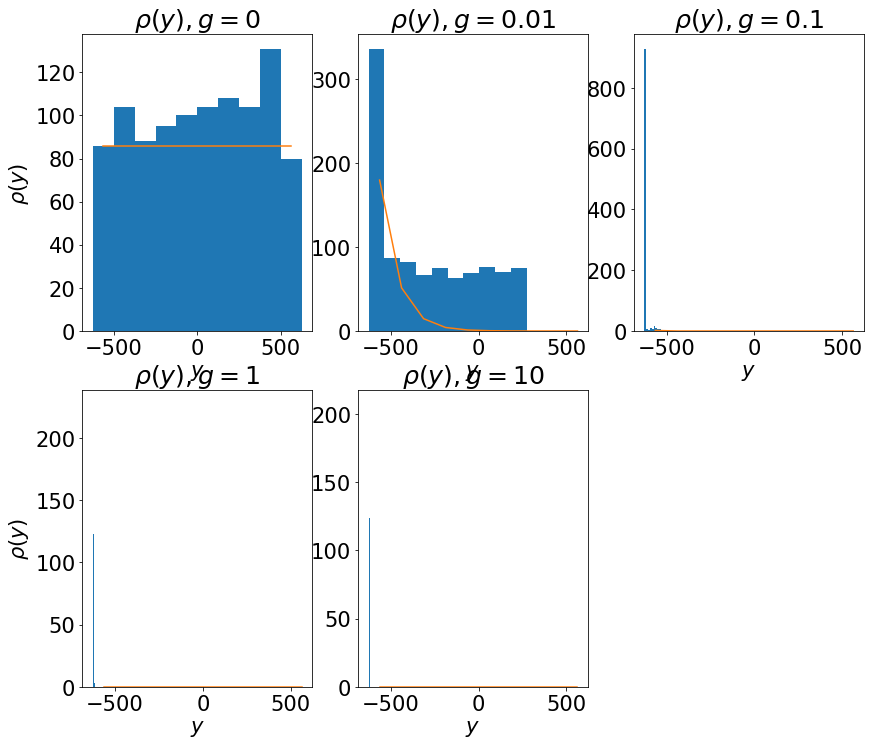

In [ ]:
fig = plt.figure(figsize=(14, 12))
plt.rcParams.update({'font.size': 21})
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 10
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i]
    y = [particle["Y"] for particle in mu["Particles"]]
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    # print(rho_0)
    hist = ax[i].hist(y, bins=num_bins)
    rho_0 = sum([hist[0][i] for i in range(1)])/1
    ax[i].set_xlabel(r"$ y $")
    ax[i].set_ylabel(r"$ \rho(y) $")
    # rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    # print(mu["Gravity"], rho_theoretical.max())
    ax[i].set_title(title)

In [ ]:
1000 / bin_width / 1253

0.09551690672021532

# 7

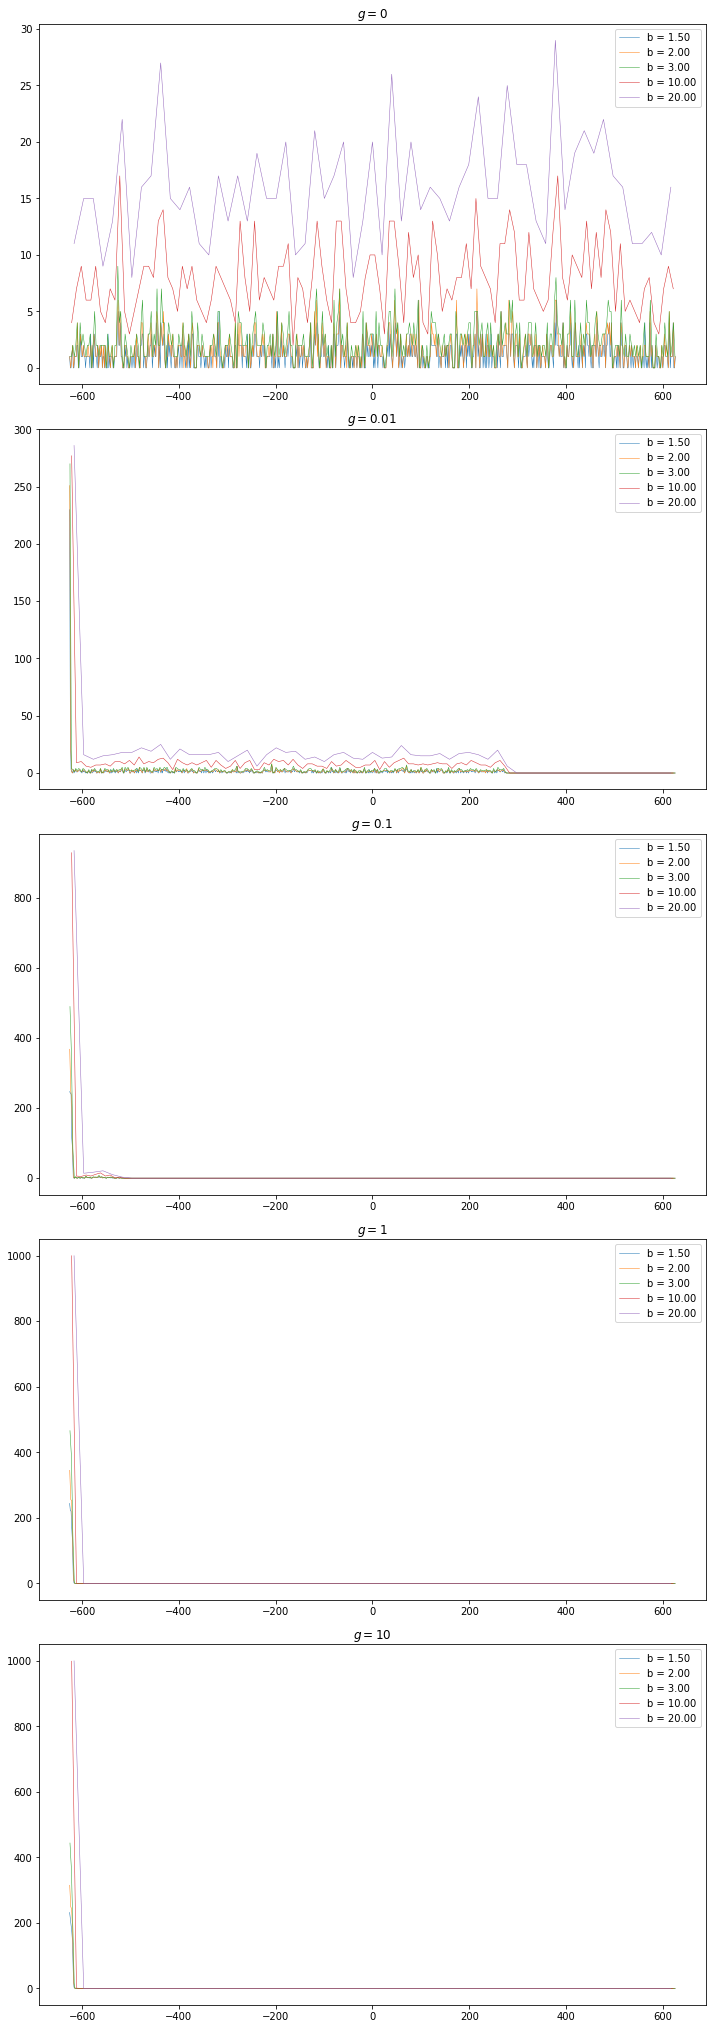

In [ ]:
def compute_density_profile(mu, b):
    # Number of slices
    n_slices = int(np.ceil(mu["Ly"] / b))
    
    # Define bin edges and centers
    bin_edges = np.linspace(-mu["Ly"] / 2, mu["Ly"] / 2, n_slices + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Count particles in each slice
    y_positions = [particle["Y"] for particle in mu["Particles"]]
    hist, _ = np.histogram(y_positions, bins=bin_edges)
    
    # Compute densities
    slice_area = mu["Lx"] * b
    densities = hist
    # print(densities.sum())
    # Store results
    result = (bin_centers, densities)
    
    return result

fig = plt.figure(figsize=(10,14.1421356*2))
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

# print(json_load)
times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}
b_values = [1.5, 2, 3, 10, 20]
ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(5, 1, positions[mus[i]["Gravity"]])
    for b in b_values:
        result =  compute_density_profile(mus[i], b)
        title = r"$ g = $" + str(mus[i]["Gravity"])
        ax[i].plot(result[0], result[1], label=f"b = {b:.2f}", lw=0.5)
    ax[i].set_title(title)
    ax[i].legend()
fig.tight_layout()
# fig.savefig("problem5_test.png")

1 0
1 10
1 0.1
1 0.01
1 1


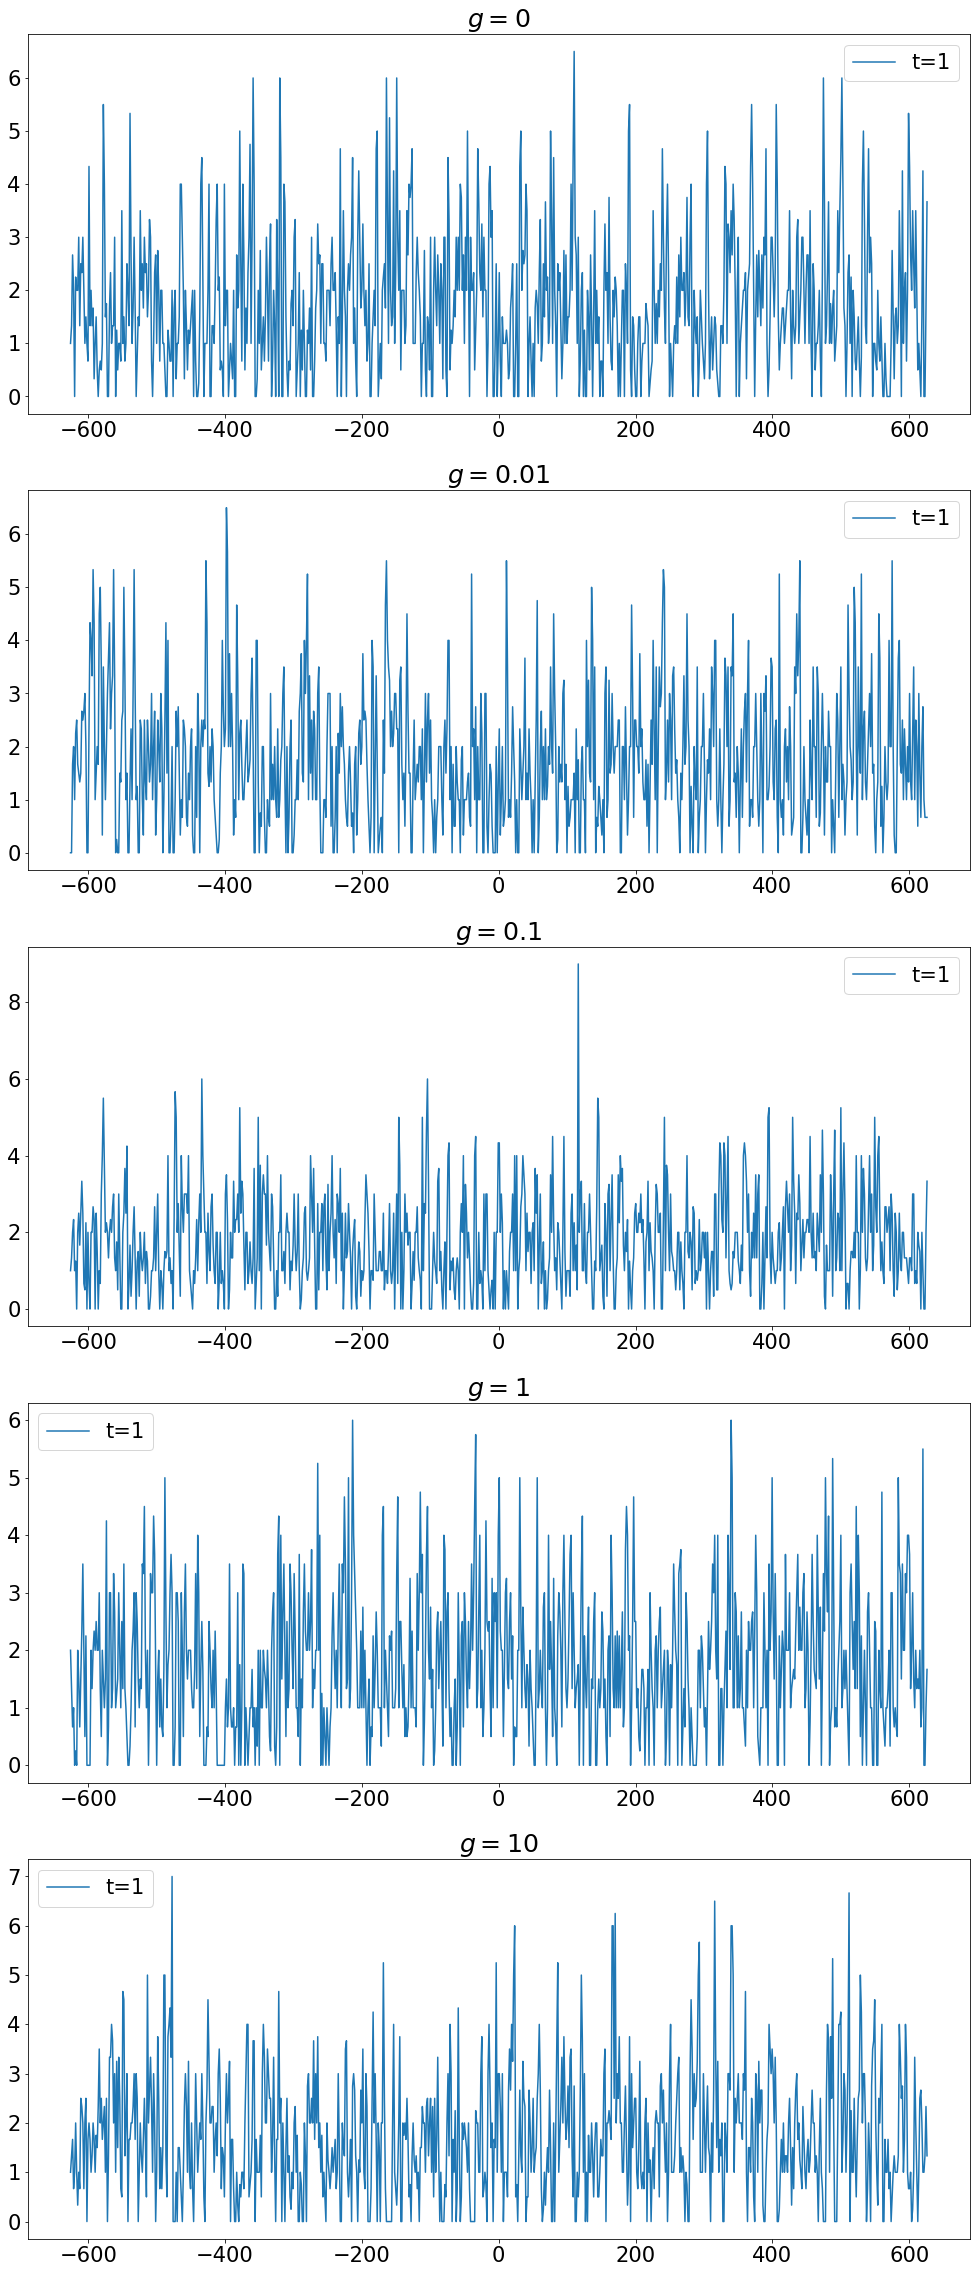

In [ ]:
def compute_density_profile_for_each_b(mu, b_values):
    # Number of slices
    results = []
    for b in b_values:
        n_slices = int(np.ceil(mu["Ly"] / b))
        
        # Define bin edges and centers
        bin_edges = np.linspace(-mu["Ly"] / 2, mu["Ly"] / 2, n_slices + 1)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Count particles in each slice
        y_positions = [particle["Y"] for particle in mu["Particles"]]
        hist, _ = np.histogram(y_positions, bins=bin_edges)
        
        # Compute densities
        slice_area = mu["Lx"] * b
        densities = hist
        # print(densities.sum())
        # Store results
        tmp = (bin_centers, densities)
        results.append(tmp)
    # Find the maximum length of bin_centers
    max_length = max(len(r[0]) for r in results)
    
    # Initialize arrays to accumulate densities
    accumulated_densities = np.zeros(max_length)
    accumulated_counts = np.zeros(max_length)
    
    for bin_centers, densities in results:
        for i, center in enumerate(bin_centers):
            idx = np.searchsorted(results[0][0], center)
            accumulated_densities[idx] += densities[i]
            accumulated_counts[idx] += 1
    
    # Compute the average densities
    average_densities = accumulated_densities / accumulated_counts
    result = (results[0][0], average_densities)
    return result

fig = plt.figure(figsize=(14, 32))
plt.rcParams.update({'font.size': 21})
json_open = open('./values/problem4/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus_list = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}
b_values = [1.5, 2, 3, 5]
ax = [fig.add_subplot(5, 1, position) for position in positions.values()]

# for mus in mus_list:
mus = mus_list[2]
for i in range(len(mus)):
    print(mus[i]["T"],mus[i]["Gravity"])
    position = positions[mus[i]["Gravity"]]-1
    result =  compute_density_profile_for_each_b(mus[i], b_values)
    title = r"$ g = $" + str(mus[i]["Gravity"])
    ax[position].plot(result[0], result[1], label=f"t="+str(mus[i]["T"]))
    ax[position].set_title(title)
    ax[position].legend()
# ax[i] = fig.add_subplot(5, 1, positions[mus[i]["Gravity"]])
# result =  compute_density_profile_for_each_b(mus[i], b_values)
# title = r"$ g = $" + str(mus[i]["Gravity"])
# ax[i].plot(result[0], result[1], label=f"t="+str(mus[i]["T"]))
# print(result[1].sum()/len(result[1]))
# ax[i].set_title(title)
# ax[i].legend()
fig.tight_layout()
# fig.savefig("problem7_test.png", dpi=400,pad_inches=0)

0.1 1
0.1 0.1
0.1 0.01
0.1 0
1 10
1 1
1 0.1
1 0.01
1 0
10 10
10 1
10 0.1
10 0.01
10 0


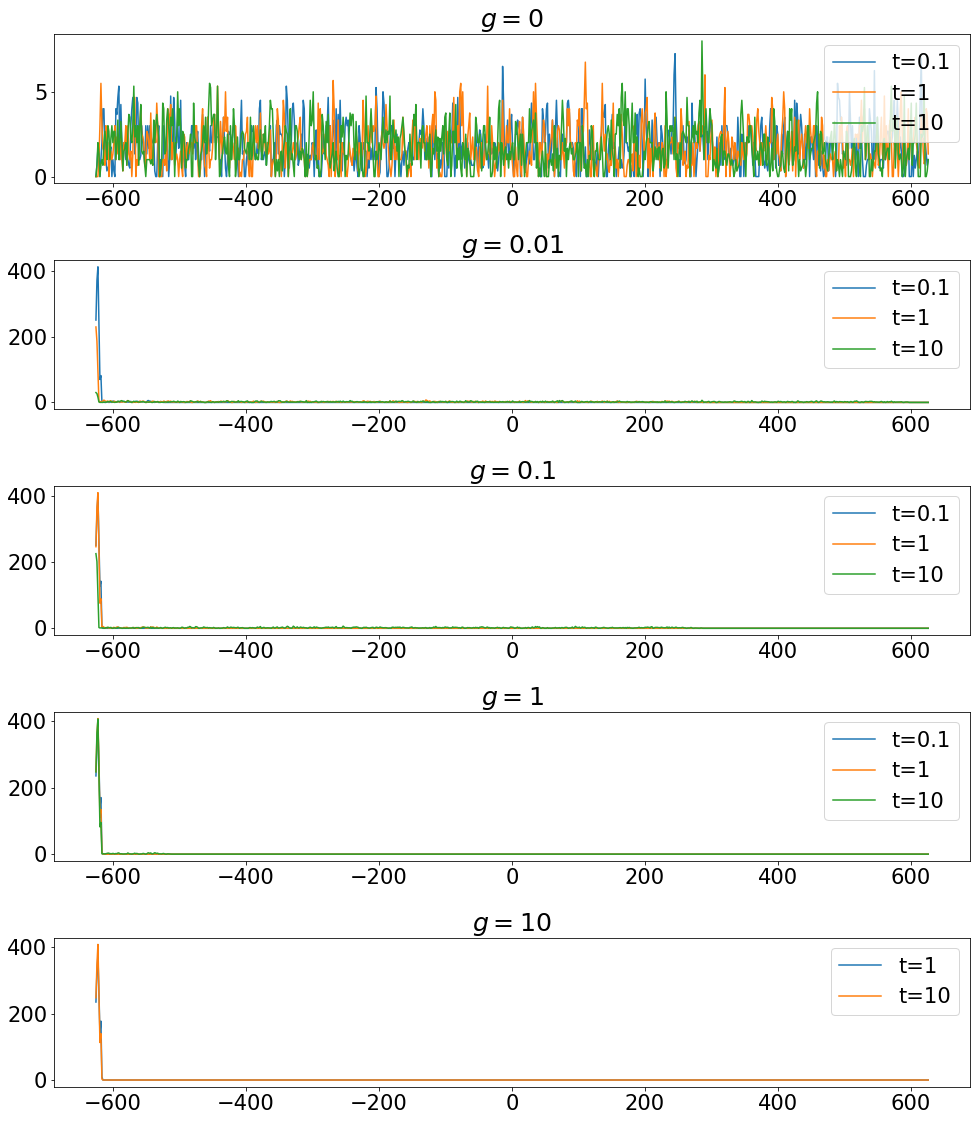

In [52]:
def compute_density_profile_for_each_b(mu, b_values):
    # Number of slices
    results = []
    for b in b_values:
        n_slices = int(np.ceil(mu["Ly"] / b))
        
        # Define bin edges and centers
        bin_edges = np.linspace(-mu["Ly"] / 2, mu["Ly"] / 2, n_slices + 1)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Count particles in each slice
        y_positions = [particle["Y"] for particle in mu["Particles"]]
        hist, _ = np.histogram(y_positions, bins=bin_edges)
        
        # Compute densities
        slice_area = mu["Lx"] * b
        densities = hist
        # print(densities.sum())
        # Store results
        tmp = (bin_centers, densities)
        results.append(tmp)
    # Find the maximum length of bin_centers
    max_length = max(len(r[0]) for r in results)
    
    # Initialize arrays to accumulate densities
    accumulated_densities = np.zeros(max_length)
    accumulated_counts = np.zeros(max_length)
    
    for bin_centers, densities in results:
        for i, center in enumerate(bin_centers):
            idx = np.searchsorted(results[0][0], center)
            accumulated_densities[idx] += densities[i]
            accumulated_counts[idx] += 1
    
    # Compute the average densities
    average_densities = accumulated_densities / accumulated_counts
    result = (results[0][0], average_densities)
    return result

fig = plt.figure(figsize=(14, 16))
plt.rcParams.update({'font.size': 21})
files = ["./values/problem7/output_0.1.json","./values/problem7/output_1.json","./values/problem7/output_10.json"]
json_open = open('./values/problem4/output_test.json', 'r')
json_load = json.load(json_open)

mus = json_load["mus"][2]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}
b_values = [1.5, 2, 3, 5]
ax = [fig.add_subplot(5, 1, position) for position in positions.values()]

# for mus in mus_list:
for file in files:
    json_open = open(file, 'r')
    json_load = json.load(json_open)
    
    mus = json_load["mus"]
    for mu in mus:
        print(mu["T"],mu["Gravity"])
        position = positions[mu["Gravity"]]-1
        result =  compute_density_profile_for_each_b(mu, b_values)
        title = r"$ g = $" + str(mu["Gravity"])
        # ax[position].set_xlim(-650, -400)
        ax[position].plot(result[0], result[1], label=f"t="+str(mu["T"]))
        ax[position].set_title(title)
        ax[position].legend()
# ax[i] = fig.add_subplot(5, 1, positions[mus[i]["Gravity"]])
# result =  compute_density_profile_for_each_b(mus[i], b_values)
# title = r"$ g = $" + str(mus[i]["Gravity"])
# ax[i].plot(result[0], result[1], label=f"t="+str(mus[i]["T"]))
# print(result[1].sum()/len(result[1]))
# ax[i].set_title(title)
# ax[i].legend()
fig.tight_layout()
fig.savefig("problem7_test.png", dpi=400,pad_inches=0)

0.1 1
0.1 0.1
0.1 0.01
0.1 0
1 10
1 1
1 0.1
1 0.01
1 0
10 10
10 1
10 0.1
10 0.01
10 0


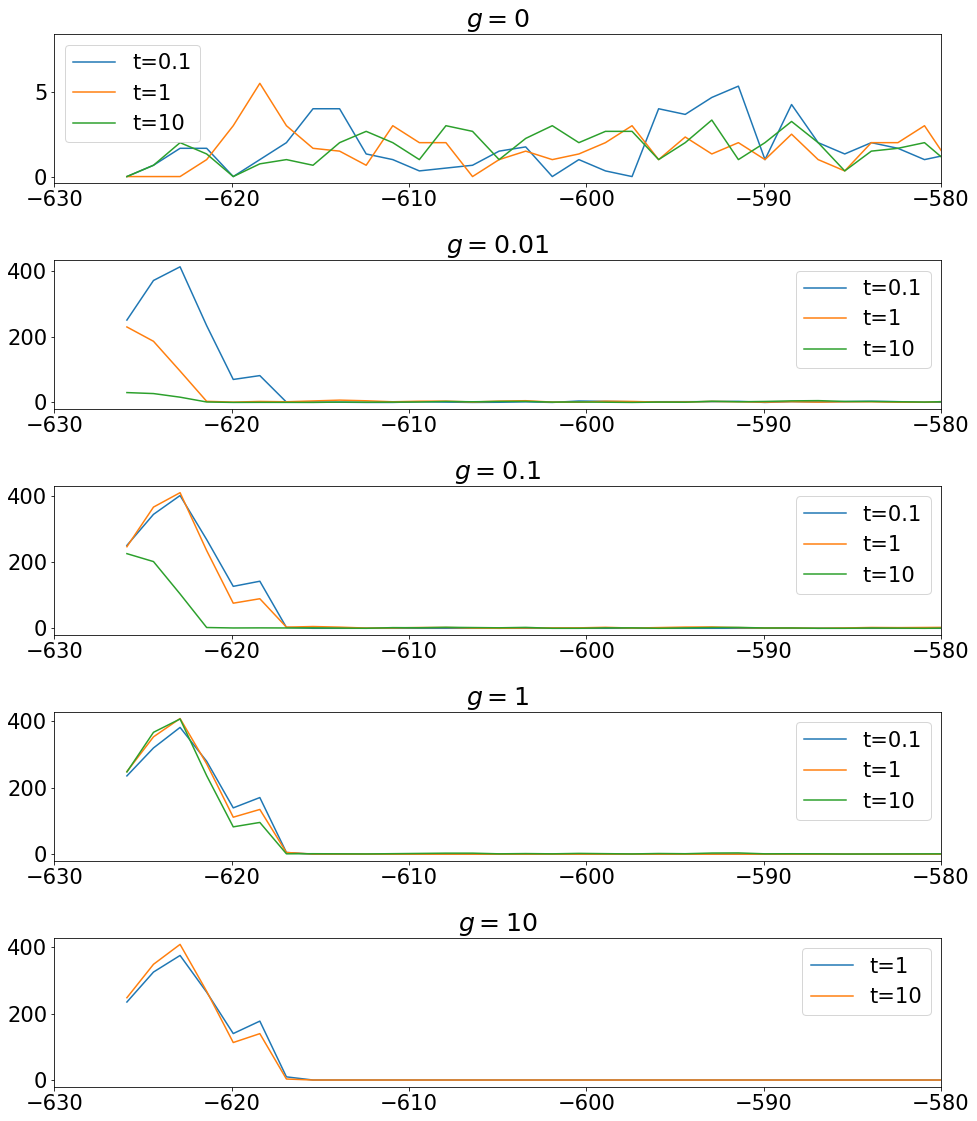

In [51]:
fig = plt.figure(figsize=(14, 16))
plt.rcParams.update({'font.size': 21})
files = ["./values/problem7/output_0.1.json","./values/problem7/output_1.json","./values/problem7/output_10.json"]
json_open = open('./values/problem4/output_test.json', 'r')
json_load = json.load(json_open)

mus = json_load["mus"][2]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}
b_values = [1.5, 2, 3, 5]
ax = [fig.add_subplot(5, 1, position) for position in positions.values()]

# for mus in mus_list:
for file in files:
    json_open = open(file, 'r')
    json_load = json.load(json_open)
    
    mus = json_load["mus"]
    for mu in mus:
        print(mu["T"],mu["Gravity"])
        position = positions[mu["Gravity"]]-1
        result =  compute_density_profile_for_each_b(mu, b_values)
        title = r"$ g = $" + str(mu["Gravity"])
        ax[position].set_xlim(-630, -580)
        ax[position].plot(result[0], result[1], label=f"t="+str(mu["T"]))
        ax[position].set_title(title)
        ax[position].legend()
# ax[i] = fig.add_subplot(5, 1, positions[mus[i]["Gravity"]])
# result =  compute_density_profile_for_each_b(mus[i], b_values)
# title = r"$ g = $" + str(mus[i]["Gravity"])
# ax[i].plot(result[0], result[1], label=f"t="+str(mus[i]["T"]))
# print(result[1].sum()/len(result[1]))
# ax[i].set_title(title)
# ax[i].legend()
fig.tight_layout()
fig.savefig("problem7_appendix.png", dpi=400,pad_inches=0)

In [16]:
def snapshots(filename):
    fig = plt.figure(figsize=(14, 16))
    plt.rcParams.update({'font.size': 21})
    json_open = open(filename, 'r')
    json_load = json.load(json_open)

    times = json_load["times"]
    mus = json_load["mus"]
    gravities = [0.0, 0.01, 0.1, 1, 10]
    positions ={
        0.0: 1,
        0.01: 2,
        0.1: 3,
        1: 4,
        10: 5
    }

    ax = [0]*(len(mus))

    for i in range(len(mus)):
        ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
        ax[i].set_xlim(-mus[i]["Lx"]/2, mus[i]["Lx"]/2)
        # print(mus[i]["Denied"])
        ax[i].set_ylim(-mus[i]["Ly"]/2, mus[i]["Ly"]/2)
        title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
        for particle in mus[i]["Particles"]:
    #         label = r"$\phi =$"+str(phis[j])
            ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.6)
        # print(mus[i]["Denied"])
        ax[i].set_title(title)
    #     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
    fig.tight_layout()
    # fig.savefig("problem5_test.png", dpi=400,pad_inches=0)

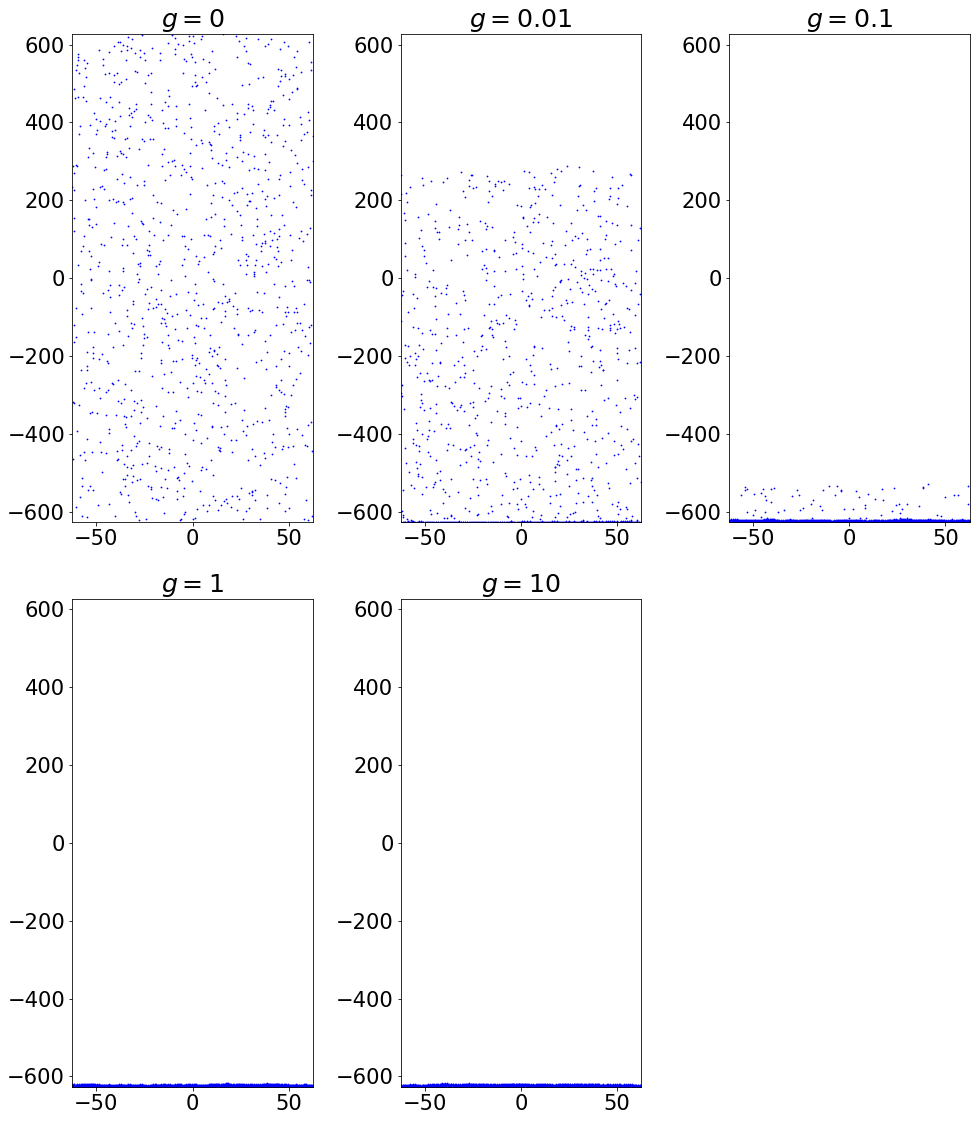

In [38]:
snapshots('./values/problem7/output_1.json')

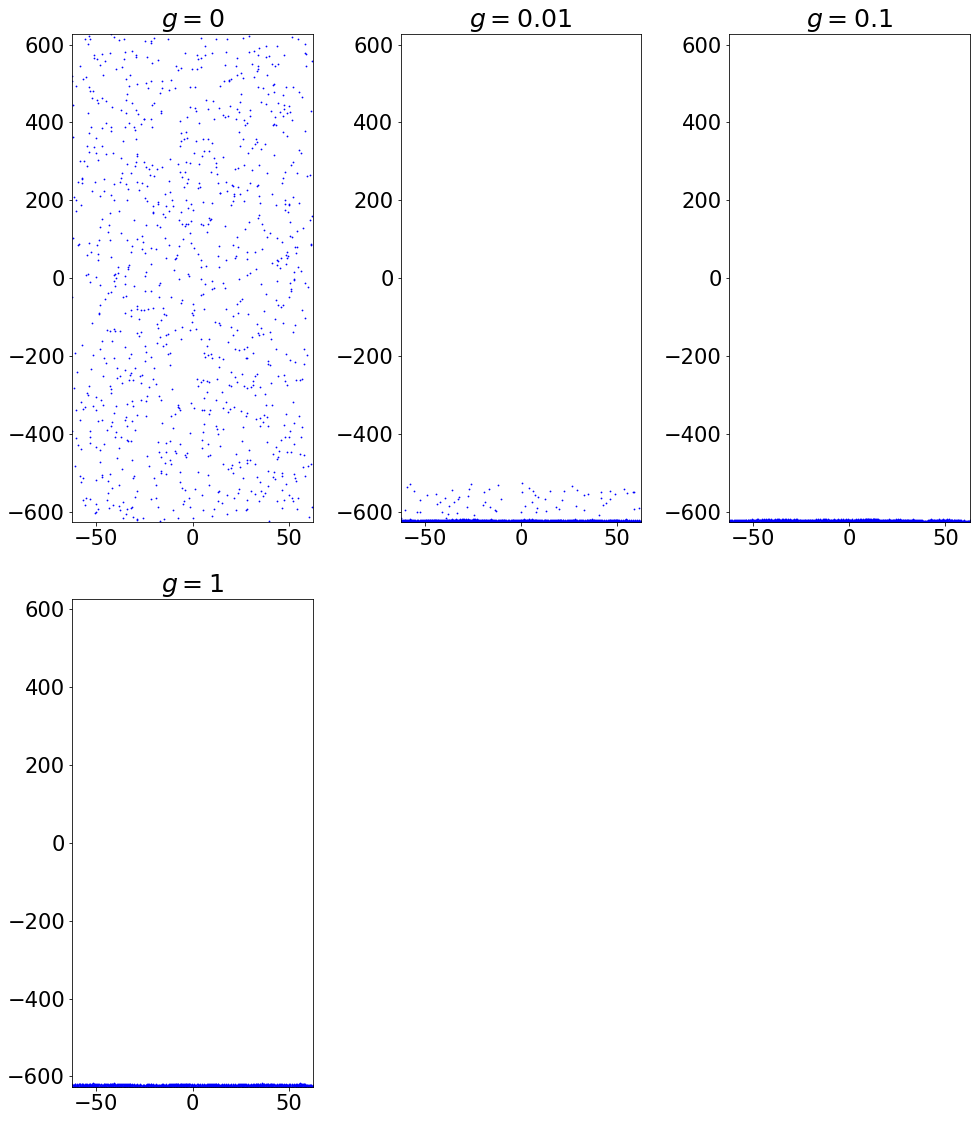

In [39]:
snapshots('./values/problem7/output_0.1.json')

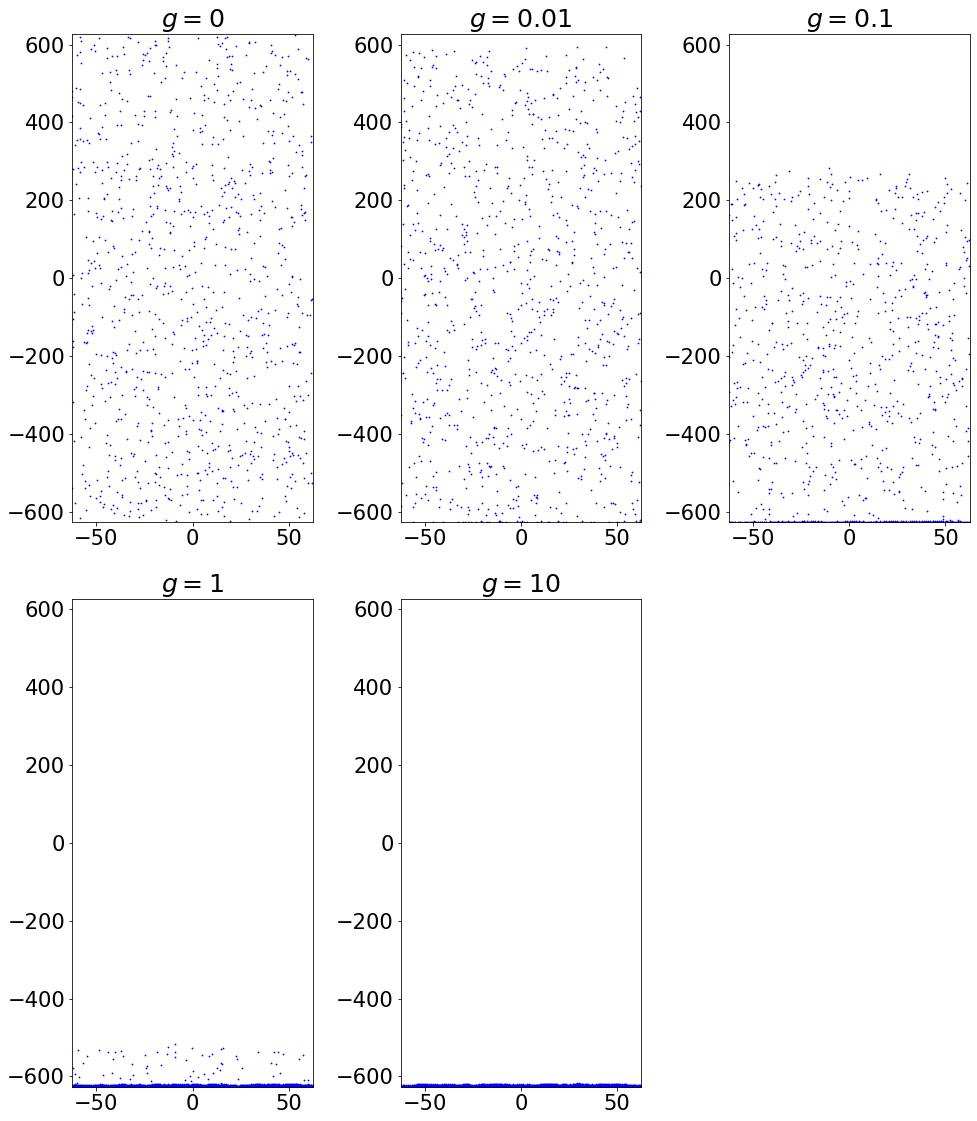

In [40]:
snapshots('./values/problem7/output_10.json')

In [ ]:
json_open = open('./values/problem4/output_test.json', 'r')
json_load = json.load(json_open)
len(json_load["mus"])

3